Описание задания:

Что делать

Получите значения AUC для различных моделей и их параметров.

Попробуйте построить модель с значением AUC лучше, чем в примерах на занятии.

 

На каких данных

Статистика пользователей adult.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv( 'affair_data.csv' )
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.shape

(6366, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affair             6366 non-null int64
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [5]:
X = pd.get_dummies(data, columns=['occupation', 'occupation_husb', 'religious'])
X.head()

,rate_marriage,age,yrs_married,children,educ,affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,...,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0,religious_1.0,religious_2.0,religious_3.0,religious_4.0
0,3.0,32.0,9.0,3.0,17.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,3.0,27.0,13.0,3.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,16.0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,16.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,14.0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [6]:
X.shape

(6366, 22)

In [7]:

y = data['affair']
del X['affair']
y.shape

(6366,)

In [8]:
from sklearn.model_selection import train_test_split

Разбиваем данные на train и test. 
Сначала берем 4 модели (KNN, логистическу регрессию, дерево и SVC с полиномиальным ядром) и с параметрами по умолчанию проводим кроссвалидацию на train наборе. Далее выбираем одну наиболее перспективную модель и подбираем параметры для улучшения результата.
В конце модель с опитмальными параметрами оцениваем на test наборе

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_train.shape, X_test.shape

((4456, 21), (1910, 21))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.model_selection import cross_val_predict

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
#clf_knn.fit(X_train, y_train)
#pred_knn = clf_knn.predict_proba(X_test)
pred_knn = cross_val_predict(clf_knn, X_train, y_train, cv=5, method='predict_proba')
pred_knn

array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       ...,
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667]])

In [14]:
from sklearn.linear_model import LogisticRegression
clf_logreg = LogisticRegression()
#clf_logreg.fit(X_train, y_train)
#pred_logreg = clf_logreg.predict_proba(X_test)
pred_logreg = cross_val_predict(clf_logreg, X_train, y_train, cv=5, method='predict_proba')
pred_logreg

array([[0.85544707, 0.14455293],
       [0.54900717, 0.45099283],
       [0.57563269, 0.42436731],
       ...,
       [0.52286483, 0.47713517],
       [0.85698941, 0.14301059],
       [0.60232162, 0.39767838]])

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth=5)
#clf_tree.fit(X_train, y_train)
#pred_tree = clf_tree.predict_proba(X_test)
pred_tree = cross_val_predict(clf_tree, X_train, y_train, cv=5, method='predict_proba')
pred_tree

array([[0.74902724, 0.25097276],
       [0.51075269, 0.48924731],
       [0.74902724, 0.25097276],
       ...,
       [0.52727273, 0.47272727],
       [1.        , 0.        ],
       [0.82579186, 0.17420814]])

In [16]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='poly', probability=True)
#clf_svc.fit(X_train, y_train)
#pred_svc = clf_svc.predict_proba(X_test)
pred_svc = cross_val_predict(clf_svc, X_train, y_train, cv=5, method='predict_proba')
pred_svc

array([[0.64708328, 0.35291672],
       [0.67913865, 0.32086135],
       [0.68840074, 0.31159926],
       ...,
       [0.69016822, 0.30983178],
       [0.77470739, 0.22529261],
       [0.69428148, 0.30571852]])

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [18]:
#print('KNeighborsClassifier:')
#print(classification_report(y_test, clf_knn.predict(X_test)))
#print('LogisticRegression:')
#print(classification_report(y_test, clf_logreg.predict(X_test)))
#print('DecisionTreeClassifier:')
#print(classification_report(y_test, clf_tree.predict(X_test)))
#print('SVC kernel Poly:')
#print(classification_report(y_test, clf_svc.predict(X_test)))

Строим ROC кривые для всех четырех моделей. Визуально, больая площать под кривой у логистической регрессии.

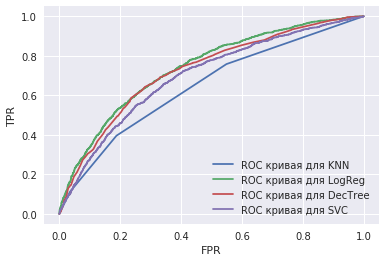

In [19]:
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_train, pred_knn[:, 1])
fpr_logreg, tpr_logreg, thresh_logreg = roc_curve(y_train, pred_logreg[:, 1])
fpr_tree, tpr_tree, thresh_tree = roc_curve(y_train, pred_tree[:, 1])
fpr_svc, tpr_svc, thresh_svc = roc_curve(y_train, pred_svc[:, 1])
plt.plot(fpr_knn ,tpr_knn, label='ROC кривая для KNN')
plt.plot(fpr_logreg ,tpr_logreg, label='ROC кривая для LogReg')
plt.plot(fpr_tree ,tpr_tree, label='ROC кривая для DecTree')
plt.plot(fpr_svc ,tpr_svc, label='ROC кривая для SVC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)

In [20]:
print('ROC AUC для моделей.')
print('KNeighborsClassifier: {}'.format(roc_auc_score(y_train, pred_knn[:, 1])))
print('LogisticRegression: {}'.format(roc_auc_score(y_train, pred_logreg[:, 1])))
print('DecisionTreeClassifier: {}'.format(roc_auc_score(y_train, pred_tree[:, 1])))
print('SVC kernel Poly: {}'.format(roc_auc_score(y_train, pred_svc[:, 1])))

ROC AUC для моделей.
KNeighborsClassifier: 0.6454238522582632
LogisticRegression: 0.7397096124950029
DecisionTreeClassifier: 0.7241439323968516
SVC kernel Poly: 0.6968147897970343


Как и предполагал, наибольший ROC auc у LogisticRegression. 
Далее используем решетчатый поиск по параметрам для улучшения roc_auc

In [21]:
from sklearn.model_selection import GridSearchCV
clf_logreg = LogisticRegression()
param_grid = {'penalty': ['l1','l2'], 'C': [0.01, 0.1, 1, 100]}
grid = GridSearchCV(clf_logreg, param_grid=param_grid, cv=5, scoring='roc_auc')

In [22]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [23]:
print('Наилучшие параметры', grid.best_params_)
print('AUC на train наборе: {}'.format(grid.score(X_train, y_train)))
print('AUC на test наборе: {}'.format(grid.score(X_test, y_test)))

Наилучшие параметры {'C': 0.1, 'penalty': 'l1'}
AUC на train наборе: 0.7477847010656042
AUC на test наборе: 0.7461706036380371


Подбор параметров позволил увеличить roc_auc логистической регрессии на тренировочном наборе. На проверочном наборе модель показала результат не сильно хуже ожидаемого